In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv('Wine.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

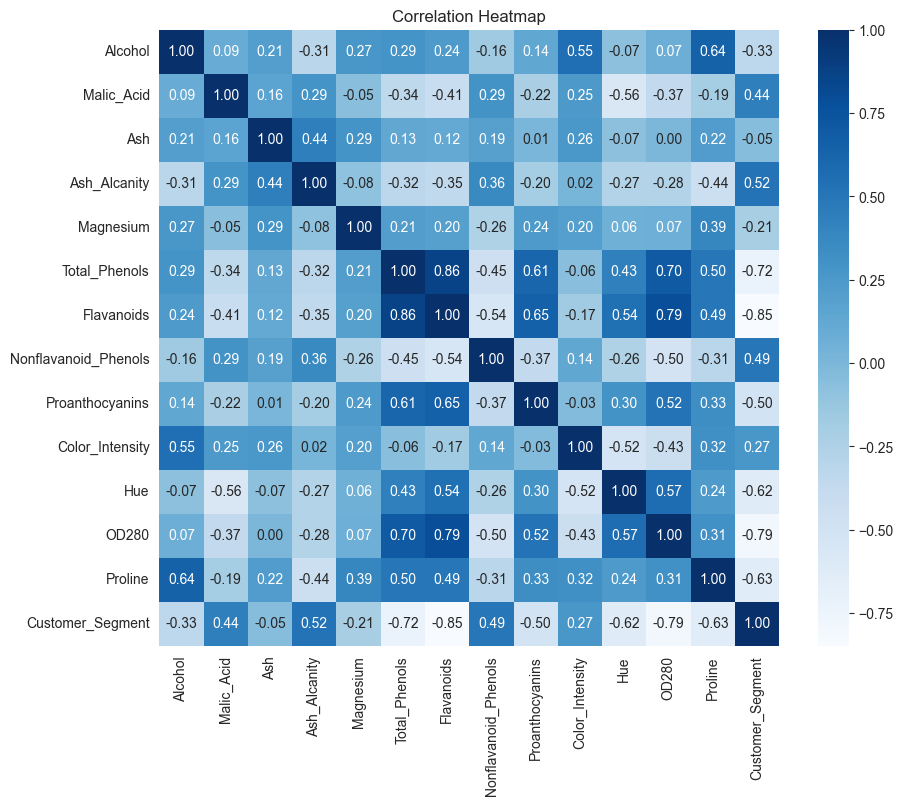

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Построим матрицу корреляции
corr = df.corr()
# Нарисуем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

### Silhouette score - это метрика, используемая для оценки качества кластеризации данных. Она измеряет, насколько объект хорошо сгруппирован в своем собственном кластере по сравнению с тем, насколько он плохо сгруппирован в других кластерах.

In [18]:
from sklearn.metrics import silhouette_score

#  Использование Silhouette score для определения лучшего числа кластеров для Gaussian Mixture Models
#Выбираем лучшее количество кластеров
min_clusters = 2
max_clusters = 10
best_score = -1
best_GMM_clusters = 0
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    gmm = GaussianMixture(n_components=n_clusters)
    labels = gmm.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_GMM_clusters = n_clusters

print("Best number of clusters for GMM:", best_GMM_clusters)
print("Silhouette Score:",best_score)

Best number of clusters for GMM: 2
Silhouette Score: 0.5831778085570662


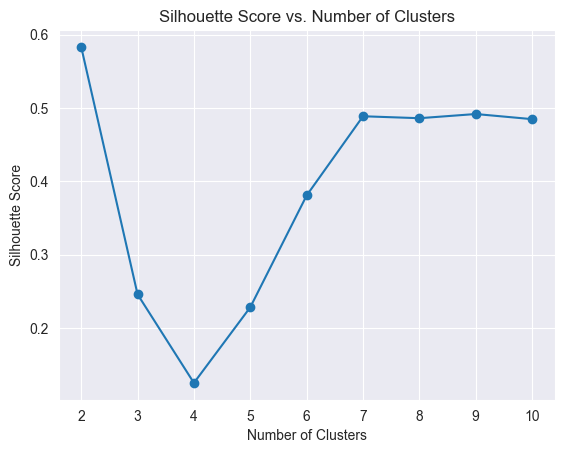

In [20]:
import numpy as np

# Построим график Silhouette score в зависимости от количества кластеров
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min_clusters, max_clusters+1, step=1))
plt.grid(True)
plt.show()

Заметим, что когда число кластеров равно 5, кэффициент силуэта минимальный. Максимум достигает при количестве кластеров равной двум

In [22]:
# Определение лучшего числа кластеров для KMeans
from sklearn.cluster import KMeans
min_clusters = 2
max_clusters = 10
best_score = -1
best_kmeans_clusters = 0
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_kmeans_clusters = n_clusters

print("Best number of clusters for KMeans:", best_kmeans_clusters)
print("Silhouette Score:", best_score)

Best number of clusters for KMeans: 2
Silhouette Score: 0.6568490946514269


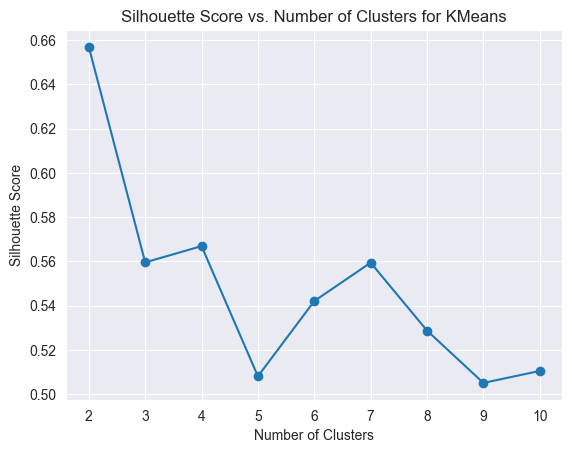

In [23]:
# Построим график Silhouette score в зависимости от количества кластеров для KMeans
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min_clusters, max_clusters+1, step=1))
plt.grid(True)
plt.show()

In [26]:
#Извлечение центроидов из алгоритма KMeans
kmeans_centroids = kmeans.cluster_centers_
print("Centroids from KMeans:\n", kmeans_centroids)

#Извлечение средних значений кластеров из GMM
gmm_means = gmm.means_
print("Means from GMM:\n", gmm_means)

Centroids from KMeans:
 [[1.26437931e+01 2.80896552e+00 2.26724138e+00 2.07241379e+01
  9.27586207e+01 1.80034483e+00 1.35379310e+00 4.06206897e-01
  1.34310345e+00 4.53482759e+00 8.73793103e-01 2.26344828e+00
  5.29827586e+02 2.44827586e+00]
 [1.38100000e+01 2.04105263e+00 2.34052632e+00 1.63210526e+01
  1.03368421e+02 2.76684211e+00 2.93578947e+00 2.72631579e-01
  1.89105263e+00 5.28631579e+00 1.04736842e+00 3.15263158e+00
  1.07578947e+03 1.00000000e+00]
 [1.31350000e+01 2.83375000e+00 2.33812500e+00 1.88062500e+01
  1.09000000e+02 2.16375000e+00 1.72062500e+00 3.64375000e-01
  1.63562500e+00 5.20812500e+00 9.32500000e-01 2.55000000e+00
  7.46687500e+02 2.06250000e+00]
 [1.41366667e+01 1.83166667e+00 2.41166667e+00 1.62666667e+01
  1.07666667e+02 3.25500000e+00 3.49333333e+00 2.71666667e-01
  2.21666667e+00 7.23333333e+00 1.11333333e+00 3.02833333e+00
  1.53033333e+03 1.00000000e+00]
 [1.37623529e+01 1.78058824e+00 2.54058824e+00 1.73588235e+01
  1.05411765e+02 2.83294118e+00 2.9758

In [27]:
# Построение DataFrame для KMeans
kmeans_clusters_means_df = pd.DataFrame(kmeans_centroids, columns=[f'Feature {i+1}' for i in range(df.shape[1])], index=[f'Cluster {i+1}' for i in range(kmeans_centroids.shape[0])])

# Построение DataFrame для GMM
gmm_clusters_means_df = pd.DataFrame(gmm_means, columns=[f'Feature {i+1}' for i in range(df.shape[1])], index=[f'Cluster {i+1}' for i in range(gmm_means.shape[0])])

# Вывод таблиц средних значений кластеров
print("KMeans Cluster Means:\n")
display(kmeans_clusters_means_df)

print("GMM Cluster Means:\n")
display(gmm_clusters_means_df)


KMeans Cluster Means:



,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14
Cluster 1,12.643793,2.808966,2.267241,20.724138,92.758621,1.800345,1.353793,0.406207,1.343103,4.534828,0.873793,2.263448,529.827586,2.448276
Cluster 2,13.810000,2.041053,2.340526,16.321053,103.368421,2.766842,2.935789,0.272632,1.891053,5.286316,1.047368,3.152632,1075.789474,1.000000
Cluster 3,13.135000,2.833750,2.338125,18.806250,109.000000,2.163750,1.720625,0.364375,1.635625,5.208125,0.932500,2.550000,746.687500,2.062500
Cluster 4,14.136667,1.831667,2.411667,16.266667,107.666667,3.255000,3.493333,0.271667,2.216667,7.233333,1.113333,3.028333,1530.333333,1.000000
Cluster 5,13.762353,1.780588,2.540588,17.358824,105.411765,2.832941,2.975882,0.308235,1.823529,5.916471,1.095294,3.038235,1270.882353,1.000000
Cluster 6,12.338235,2.391176,2.223529,20.529412,90.176471,2.338235,2.258235,0.354118,1.594706,2.794706,0.969412,2.954118,347.705882,2.000000
Cluster 7,12.795000,2.413125,2.425937,20.525000,96.968750,2.015000,1.331875,0.421250,1.338125,6.012500,0.848125,2.139375,648.343750,2.562500
Cluster 8,13.432500,1.713750,2.413750,19.525000,115.750000,2.831250,2.820000,0.288750,2.057500,4.475000,1.116250,3.267500,964.625000,1.250000
Cluster 9,12.472273,2.137727,2.352273,21.036364,93.090909,2.209091,1.958182,0.390455,1.514091,4.457273,1.010455,2.447727,443.272727,2.227273
Cluster 10,12.922500,2.535000,2.455000,20.050000,109.000000,2.163333,1.703333,0.362500,1.510833,5.609167,0.848833,2.504167,856.750000,2.000000


GMM Cluster Means:



,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14
Cluster 1,12.950440,2.621713,2.372712,19.468764,101.040925,2.115706,1.505907,0.419750,1.564606,6.029119,0.882078,2.248081,700.414138,2.368391
Cluster 2,13.761884,1.773099,2.531886,17.375331,104.813786,2.822516,2.987552,0.303137,1.832486,5.892589,1.093130,3.044940,1264.358041,1.000000
Cluster 3,12.379312,1.985457,2.314102,20.781834,93.709261,2.408693,2.224536,0.372951,1.588702,3.718039,1.099385,2.581752,430.130661,2.117625
Cluster 4,13.751219,1.969186,2.348733,16.975062,105.040376,2.794562,2.921632,0.272488,1.895428,5.168207,1.057492,3.189244,1057.689892,1.041666
Cluster 5,14.066667,1.883333,2.445000,16.366667,108.833333,3.205000,3.303333,0.283333,2.186667,6.833333,1.096667,3.046667,1479.500000,1.000000
Cluster 6,13.103814,2.308419,2.433900,19.538912,111.612087,2.314376,1.978730,0.347236,1.672739,5.382791,0.909758,2.728213,855.994153,1.833458
Cluster 7,12.575570,2.341220,2.252265,20.181994,91.042707,1.747723,1.431859,0.395896,1.333695,4.917696,0.868164,2.254050,498.045966,2.363682
Cluster 8,12.752549,2.934437,2.401465,21.575178,96.837271,1.836333,1.179906,0.404513,1.225542,5.006172,0.850907,2.169366,591.353494,2.605947
Cluster 9,12.295000,2.484375,2.255625,20.812500,90.437502,2.362500,2.272500,0.361250,1.603125,2.681875,0.955625,2.983750,344.937519,2.000000
Cluster 10,14.190000,1.590000,2.480000,16.500000,108.000000,3.300000,3.930000,0.320000,1.860000,8.700000,1.230000,2.820000,1680.000000,1.000000


In [33]:
# Снижение размерности данных до 2D с помощью PCA
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(df)

# Создание DataFrame для удобства работы с PCA-данными
reduced_df = pd.DataFrame(reduced_X, columns=['PCA1', 'PCA2'])



In [34]:
# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(df)
# Кластеризация с использованием GMM
gmm = GaussianMixture(n_components=best_n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(df)

# Добавление меток кластеров в DataFrame
reduced_df['KMeans_Cluster'] = kmeans_labels
reduced_df['GMM_Cluster'] = gmm_labels

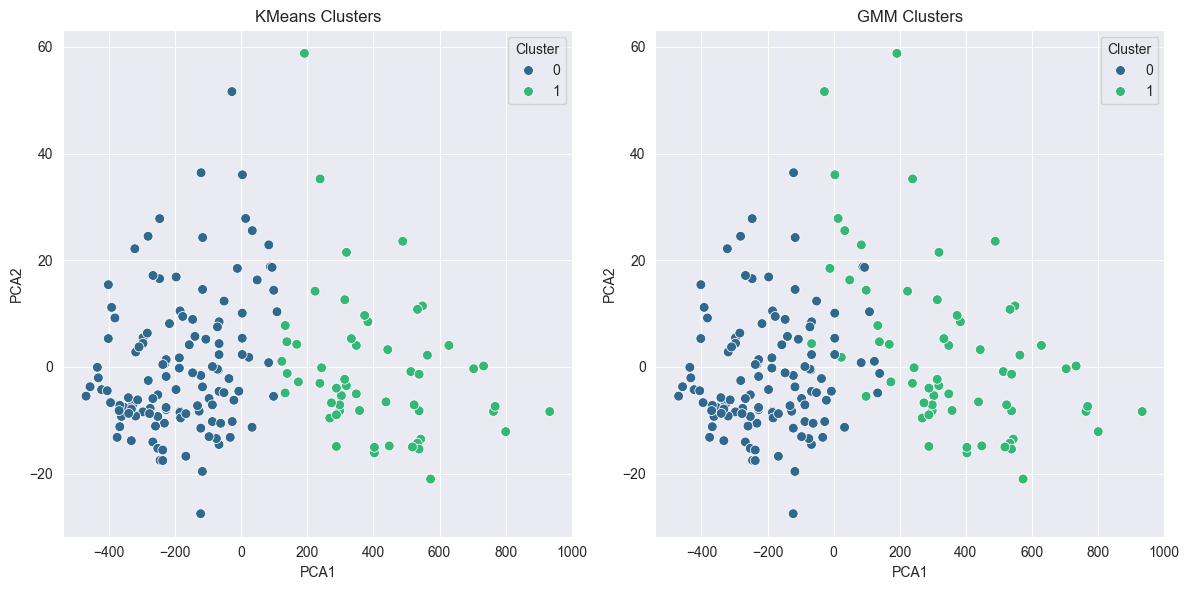

In [43]:
# Визуализация кластеров для KMeans
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=reduced_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', s=50)
plt.title('KMeans Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='best')
# Визуализация кластеров для GMM
plt.subplot(1, 2, 2)
sns.scatterplot(data=reduced_df, x='PCA1', y='PCA2', hue='GMM_Cluster', palette='viridis', s=50)
plt.title('GMM Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='best')

plt.tight_layout()
plt.show()

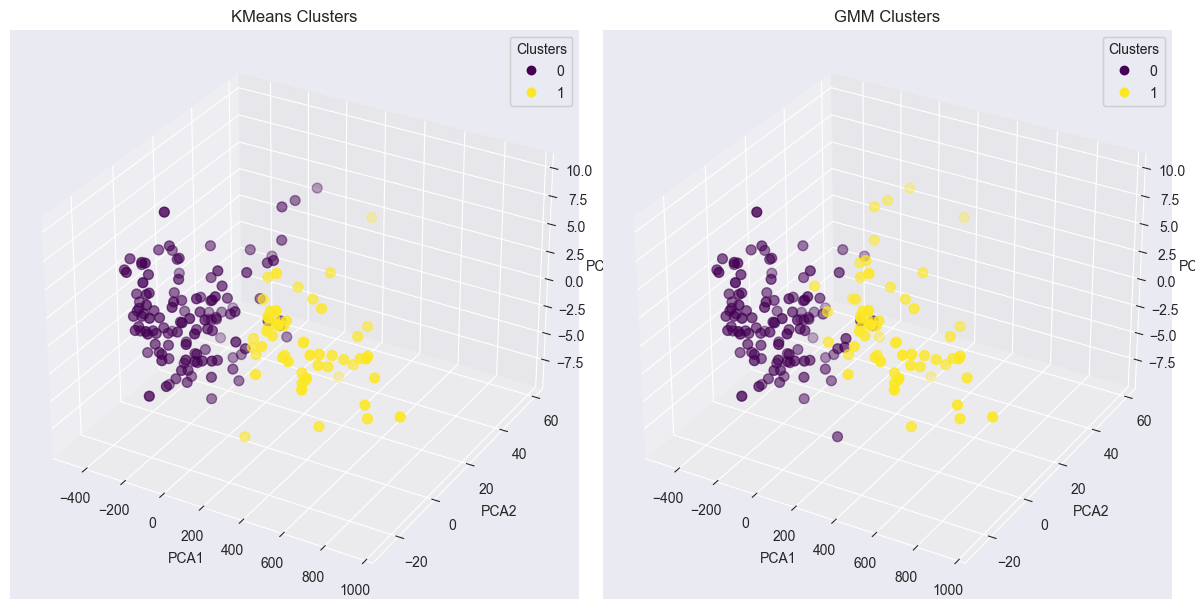

In [44]:
# Снижение размерности данных до 3D с помощью PCA
pca = PCA(n_components=3)
reduced_X = pca.fit_transform(df)
reduced_df = pd.DataFrame(reduced_X, columns=['PCA1', 'PCA2', 'PCA3'])
# Визуализация кластеров для KMeans
fig = plt.figure(figsize=(12, 6))

# Добавление меток кластеров в DataFrame
reduced_df['KMeans_Cluster'] = kmeans_labels
reduced_df['GMM_Cluster'] = gmm_labels


ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter(reduced_df['PCA1'], reduced_df['PCA2'], reduced_df['PCA3'], c=reduced_df['KMeans_Cluster'], cmap='viridis', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('KMeans Clusters')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Визуализация кластеров для GMM
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter(reduced_df['PCA1'], reduced_df['PCA2'], reduced_df['PCA3'], c=reduced_df['GMM_Cluster'], cmap='viridis', s=50)
legend2 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend2)
ax.set_title('GMM Clusters')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.tight_layout()
plt.show()

Кластеры алгоритмы KMeans распределены лучше, что указывает на большую эффективность, чем GMM. 